# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [1]:
import pandas as pd
df = pd.read_csv('spambase_data.csv',header =None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [2]:
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [10]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Prediction and Evaluation

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
predictions = knn.predict(X_test)

In [13]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       863
           1       0.74      0.72      0.73       518

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.80      0.80      0.80      1381

Confusion Matrix
[[730 133]
 [145 373]]

 Accuracy
0.7986965966690803


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [14]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.77090119 0.78586957 0.825      0.80543478 0.69456522]
mean score:  0.7763541519142709


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [18]:
#min-max normalization
for col in df.columns[:-1]:
    df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())

X=df[df.columns[:-1]] #selecting the independent variables
Y = df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

In [19]:
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.8534202  0.88695652 0.90652174 0.90434783 0.73913043]
mean score:  0.8580753434357741
scores:  [0.86536374 0.90434783 0.90978261 0.89456522 0.75      ]
mean score:  0.8648118774488976


#### Q2: Write your observation regarding change in the perfromance of KNN

We get better accuracy after Normalization.

#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [20]:
knn_cv = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())



scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [25]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    print("The value of k is "+str(k))
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    k_scores.append(scores.mean())

The value of k is 1
scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891
The value of k is 2
scores:  [0.84256243 0.88804348 0.91413043 0.88152174 0.78586957]
mean score:  0.8624255299060568
The value of k is 3
scores:  [0.8534202  0.88695652 0.90652174 0.90434783 0.73913043]
mean score:  0.8580753434357741
The value of k is 4
scores:  [0.85233442 0.88586957 0.90869565 0.89456522 0.77608696]
mean score:  0.8635103620828023
The value of k is 5
scores:  [0.86536374 0.89130435 0.91304348 0.89891304 0.75434783]
mean score:  0.8645944861445498
The value of k is 6
scores:  [0.84690554 0.88478261 0.91413043 0.88804348 0.77391304]
mean score:  0.8615550205353351
The value of k is 7
scores:  [0.86102063 0.88804348 0.91956522 0.90217391 0.76086957]
mean score:  0.8663345607326631
The value of k is 8
scores:  [0.85559175 0.8826087  0.91195652 0.90217391 0.76521739]
mean score:  0.8635096539678043
The value of k is 9
scores:  [0.85559175 0.88695652 0.91

#### Q5: Plot the graph between k and the accuracy score and find the best value of k

maximum score:  0.8663345607326631
Best K value:  7


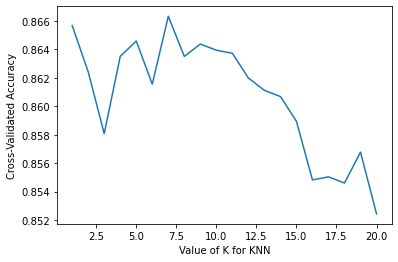

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print('maximum score: ', max(k_scores))
#best_k=k_scores.index(max(k_scores))
print('Best K value: ', k_scores.index(max(k_scores))+1)
#print(k_range[best_k])

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [27]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    print("The value of k is "+str(k))
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    k_scores.append(scores.mean())

The value of k is 1
scores:  [0.86862106 0.89456522 0.91195652 0.89565217 0.75543478]
mean score:  0.8652459519425955
The value of k is 2
scores:  [0.85016287 0.88804348 0.90108696 0.875      0.81521739]
mean score:  0.8659021385072936
The value of k is 3
scores:  [0.86536374 0.90434783 0.90978261 0.89456522 0.75      ]
mean score:  0.8648118774488976
The value of k is 4
scores:  [0.86102063 0.89021739 0.91086957 0.87717391 0.79347826]
mean score:  0.8665519520370107
The value of k is 5
scores:  [0.87187839 0.9        0.92282609 0.90108696 0.76630435]
mean score:  0.8724191568710757
The value of k is 6
scores:  [0.85450597 0.89021739 0.92173913 0.89347826 0.78913043]
mean score:  0.8698142378322238
The value of k is 7
scores:  [0.86753529 0.90108696 0.92717391 0.9        0.77282609]
mean score:  0.8737244488504933
The value of k is 8
scores:  [0.85450597 0.88695652 0.91847826 0.89130435 0.80326087]
mean score:  0.8709011943539631
The value of k is 9
scores:  [0.86319218 0.8923913  0.92

#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

maximum score:  0.8769862625690413
Best K value:  9


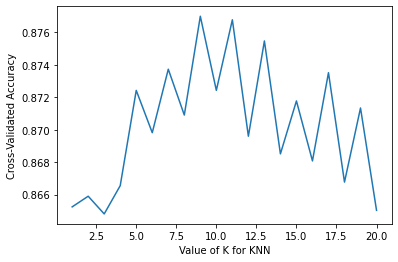

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print('maximum score: ', max(k_scores))
#best_k=k_scores.index(max(k_scores))
print('Best K value: ', k_scores.index(max(k_scores))+1)
#print(k_range[best_k])

#### Q8: Write your observation

In [34]:
# While using Euclidean distance, maximum score:  0.8663345607326631 and Best K value:  7
# While using Manhattan distance, maximum score:  0.8769862625690413 and Best K value:  9

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [32]:
knn_cv = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.86210641 0.89021739 0.90978261 0.90978261 0.74347826]
mean score:  0.863073455129113


#### Q10: What is the best k value in this model. Take max k =20

In [33]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    print("The value of k is "+str(k))
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    k_scores.append(scores.mean())
    
print('Best K value: ', k_scores.index(max(k_scores))+1)

The value of k is 1
scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891
The value of k is 2
scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75217391]
mean score:  0.8658988339706368
The value of k is 3
scores:  [0.86210641 0.89021739 0.90978261 0.90978261 0.74347826]
mean score:  0.863073455129113
The value of k is 4
scores:  [0.86319218 0.89347826 0.91630435 0.9173913  0.75652174]
mean score:  0.8693775669168673
The value of k is 5
scores:  [0.8762215  0.8923913  0.91847826 0.90978261 0.76304348]
mean score:  0.8719834301090497
The value of k is 6
scores:  [0.87947883 0.89565217 0.92173913 0.91413043 0.76956522]
mean score:  0.8761131567766606
The value of k is 7
scores:  [0.87513572 0.89456522 0.92826087 0.91413043 0.775     ]
mean score:  0.8774184487560779
The value of k is 8
scores:  [0.86970684 0.89673913 0.925      0.91413043 0.7673913 ]
mean score:  0.8745935419912195
The value of k is 9
scores:  [0.87187839 0.89673913 0.923